<a href="https://colab.research.google.com/github/wallik2/DeepLearningAndrewNG/blob/ch1_NN/%5BVectorize%5D_Extended_Shallow_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Extended Shallow learning

- Show the updated parameter for every epoch
- Time catch

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
import pandas as pd, numpy as np,matplotlib.pyplot as plt
from time import time
import csv

In [10]:
df = pd.read_csv('/content/drive/MyDrive/dataset/Andrew NG/churn_small3.csv')

In [11]:
X = df[['tenure'	,'TotalCharges'	,'PaperlessBilling']]
y = df[['Churn']]

<details>
<summary>Shallow Neural Network</summary>

<img src = 'https://i.ibb.co/cr1sQJ8/IMG-8053.jpg'>



</details>



---



In [12]:
"""
Utility Functions
"""

def tanh(z):
  return ( np.exp(z) - np.exp(-z) ) / ( np.exp(z) + np.exp(-z) )

def sigmoid(z):
  return 1/(1+np.exp(-z))

def ReLU(z):
  return np.where(z>=0,z,0)

def LeakyReLU(z:float):
  return np.where(z>=0,z,0.01*z)

def update_param(var,dvar,lr=0.005):
  return var - lr * dvar

def binary_cross_entropy(a,y):
  return -((y * np.log(a)) + ((1-y) * np.log(1-a)))

In [13]:
"""
Derivative of Activation Functions
"""

def dReLU(z:float):
  return np.where(z>=0,1,0)

def dLeakyReLU(z:float):
  return np.where(z>=0,1,0.01)

def dTanh(z:float):
  a = tanh(z)  
  return 1-a**2



<details>
<summary> <h2>Setup Explanation</h2> </summary>

#### Set up Parameter

```
setting = {'n1':len(X.columns), # Represent number of unit in input layer
           'm' : len(X), 
           'n2' : 4, # number of unit but hidden layer
            'n3' : 1} # ,, Output layer
           # We replace n1 = n_x
```






- X shape : n1 * m 
- W : n1 * n2

```
np.random.random(size = (3,4))
```

> return uniformly distributed from [0,1]
> We multiply by 0.01 to make the Z not too extreme, so all does not close to -1 nor 1 

#### Propogation

Derivative cheat sheet:
<img src = 'https://i.ibb.co/rdrPKDQ/ss.jpg'>

- If we change the activation function for hidden layer: then the formula to obtain dz1 is slightly changed 

<img src = 'https://i.imgur.com/IMJjWUd.png'>
- Cr. Andrew

</details>

In [14]:

def shallow_NN(X,y,hidden_unit = 4, epochs=10000, lr = 1e-6, activation_function='tanh'):
  """

  @X
  : X: predictor (Must be Pandas dataframe or Series)

  @y
  : y : class (Must be Pandas Series) 

  @hidden_unit
  : Number of hidden unit (default=4)

  @epochs
  : Number of epoch (default=10000)

  @lr
  : learning rate (default=10^-6)

  @activation function : 
  Description: activation function for the hidden layer
  Must be one of ['tanh','ReLU','LeakyReLU']

  """

  # Select the activation function
  if activation_function == 'tanh':
    g = tanh
    g_ = dTanh
  elif activation_function == 'ReLU':
    g = ReLU
    g_ = dReLU
  elif activation_function == 'LeakyReLU':
    g = LeakyReLU
    g_ = dLeakyReLU
  else :
    print(f"Activation function {activation_function } is not available")
    print("Pick tanh (default) instead")
    g = tanh
    g_ = dTanh
  

  # For generate Report
  csv_file = open('report.csv','w')
  csv_writer = csv.writer(csv_file)

  csv_writer.writerow(['epoch','W1','W2','b1','b2','dw1','dw2','db1','db2','cost'])
  tic = time()

  # Main 

  #Setup
  np.random.seed(42)

  n0 = len(X.columns)
  n1 = hidden_unit
  n2 = 1

  m = len(X) 

  # Initiate param
  X = X.to_numpy().T   # shape : n0*m
  y = y.to_numpy().T   # shape : 1*m

  """ For Layer one """
  W1 = np.random.random(size = (n0,n1)) * 0.01
  b1 = np.zeros(shape=(n1,1))

  """ FOr Layer Two """
  W2 = np.random.random(size = (n1,1)) * 0.01
  b2 = np.zeros(shape=(n2,1))



  # Training
  for epoch in range(1,epochs+1):

    # Forward Propagation
    """ Layer one """
    Z1 = np.dot(W1.T,X) + b1  # shape : 4*7032
    a1 = g(Z1)         # shape : 4*7032

    """ Layer Two """
    Z2 = np.dot(W2.T,a1) + b2 #shape : 1*7032
    a2 = sigmoid(Z2)        #shape : 1*7032

    """ Loss/Cost Function """
    loss = binary_cross_entropy(a2,y) #simply loss function for derivative
    loss = np.sum(loss, axis = 1) 
    cost = loss/m 


    # Backward Propagation (To return error)
    """Layer Two"""
    dz2 = a2-y
    dw2 = (1/m) * np.dot(dz2,a1.T).T    
    """สงสัย : dW2 shape must be 4*1, so I have to transpose the np.dot again, BUT I DO NOT UNDERSTAND WHY Andrew do not have to transpose"""
    db2 = (1/m) * np.sum(dz2,axis=1,keepdims = True) 

    """Layer One"""
    dz1 = np.dot(W2,dz2) * g_(Z1)   # A1 = g'(Z1) ;which represent as g(Z1)     """Weird mark : Why we don't have to transpose W2 ?"""
    dw1 = (1/m) * np.dot(dz1,X.T).T   #
    db1 = (1/m) * np.sum(dz1,axis=1,keepdims = True) 

    # Update param (To update param)
    W2 -= lr*dw2
    b2 -= lr*db2
    W1 -= lr*dw1
    b1 -= lr*db1

    # Generate Report
    csv_writer.writerow([epoch,W1,W2,b1,b2,dw1,dw2,db1,db2,cost[0]])

    if epoch % 100 == 0:
      print(f'Epoch : {epoch}/{epochs} ====: {cost}')

    if np.isnan(cost):
      print("Overflow....Stop")
      break

  toc = time()
  print(f"\n {epochs} epoch : {(toc-tic)/60} minute")

  csv_file.close()
  report = pd.read_csv('/content/report.csv')
  description = f'Shallow Neural network with {n1} hidden unit(s) with activation function {activation_function}'
  return report,description

In [15]:
def report_plotter(report,description):
  """
  @report:
    must be the report from the Shallow_NN function
  @description:
    for the title of plot
    purpose: to compare the performance with each number of unit & activation function
  """
  plt.plot(report['epoch'],report['cost'])
  plt.xlabel('epoch')
  plt.ylabel('cost')
  plt.title(description)
  plt.show()

# Test & Plot

- Let's compare the cost funciton of each type of activation function in the hidden layer. Criteria would be cost & time

Epoch : 100/1000 ====: [0.69142763]
Epoch : 200/1000 ====: [0.68776147]
Epoch : 300/1000 ====: [0.6841995]
Epoch : 400/1000 ====: [0.68073896]
Epoch : 500/1000 ====: [0.67737955]
Epoch : 600/1000 ====: [0.67412007]
Epoch : 700/1000 ====: [0.67095866]
Epoch : 800/1000 ====: [0.66789308]
Epoch : 900/1000 ====: [0.66492082]
Epoch : 1000/1000 ====: [0.66203928]

 1000 epoch : 0.35261011918385826 minute


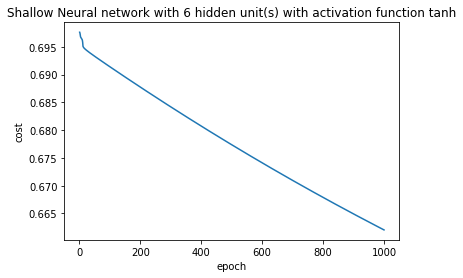

In [19]:
report , description = shallow_NN(X=X,y=y,hidden_unit=6,epochs=1000,lr = 1e-4,activation_function='tanh')
report_plotter(report , description)

Epoch : 100/1000 ====: [0.57217224]
Epoch : 200/1000 ====: [0.57211018]
Epoch : 300/1000 ====: [0.57204781]
Epoch : 400/1000 ====: [0.57198504]
Epoch : 500/1000 ====: [0.57192182]
Epoch : 600/1000 ====: [0.57185809]
Epoch : 700/1000 ====: [0.57179379]
Epoch : 800/1000 ====: [0.57172885]
Epoch : 900/1000 ====: [0.57166321]
Epoch : 1000/1000 ====: [0.57159678]

 1000 epoch : 0.08827888170878093 minute


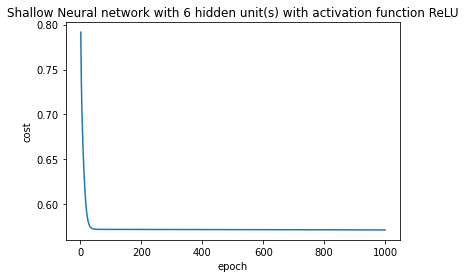

In [20]:
report , description = shallow_NN(X=X,y=y,hidden_unit=6,epochs=1000,lr = 1e-4,activation_function='ReLU')
report_plotter(report , description)

Epoch : 100/1000 ====: [0.57217275]
Epoch : 200/1000 ====: [0.5721107]
Epoch : 300/1000 ====: [0.57204833]
Epoch : 400/1000 ====: [0.57198556]
Epoch : 500/1000 ====: [0.57192234]
Epoch : 600/1000 ====: [0.57185861]
Epoch : 700/1000 ====: [0.57179431]
Epoch : 800/1000 ====: [0.57172938]
Epoch : 900/1000 ====: [0.57166373]
Epoch : 1000/1000 ====: [0.57159731]

 1000 epoch : 0.08561137914657593 minute


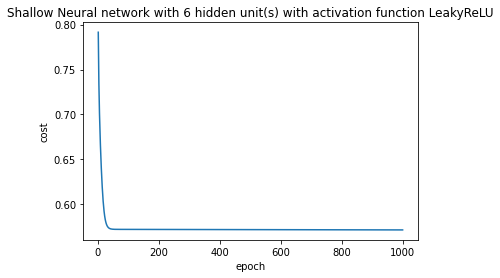

In [21]:
report , description = shallow_NN(X=X,y=y,hidden_unit=6,epochs=1000,lr = 1e-4,activation_function='LeakyReLU')
report_plotter(report , description)

 >Seems like ReLU family would be the fastest, also have the best accuracy among other activation functions.


ReLU but 1000000 epochs 

Streaming output truncated to the last 5000 lines.
Epoch : 500300/1000000 ====: [0.47109176]
Epoch : 500400/1000000 ====: [0.4712586]
Epoch : 500500/1000000 ====: [0.4703765]
Epoch : 500600/1000000 ====: [0.47103196]
Epoch : 500700/1000000 ====: [0.47046511]
Epoch : 500800/1000000 ====: [0.47121148]
Epoch : 500900/1000000 ====: [0.47044118]
Epoch : 501000/1000000 ====: [0.47049925]
Epoch : 501100/1000000 ====: [0.4708799]
Epoch : 501200/1000000 ====: [0.47100763]
Epoch : 501300/1000000 ====: [0.4712572]
Epoch : 501400/1000000 ====: [0.47036234]
Epoch : 501500/1000000 ====: [0.47107288]
Epoch : 501600/1000000 ====: [0.47135226]
Epoch : 501700/1000000 ====: [0.47021586]
Epoch : 501800/1000000 ====: [0.47068107]
Epoch : 501900/1000000 ====: [0.47091265]
Epoch : 502000/1000000 ====: [0.47063311]
Epoch : 502100/1000000 ====: [0.47117666]
Epoch : 502200/1000000 ====: [0.47099944]
Epoch : 502300/1000000 ====: [0.47100999]
Epoch : 502400/1000000 ====: [0.47055859]
Epoch : 502500/1000000 ====: 

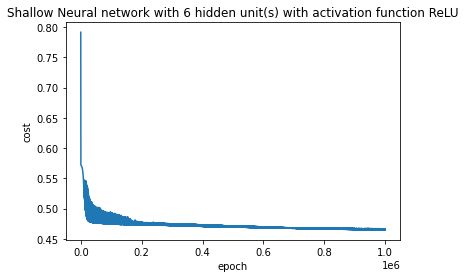

In [22]:
report , description = shallow_NN(X=X,y=y,hidden_unit=6,epochs=1000000,lr = 1e-4,activation_function='ReLU')
report_plotter(report , description)

# comment : The loss function is fluctuating, perhap the learning rate need to be adjust from 1e-4 to be lower (Future : Optimizer)

In [25]:
# Best epoch with the minimum cost 

(report[report.cost == report.cost.min()])

,epoch,W1,W2,b1,b2,dw1,dw2,db1,db2,cost
999976,999977,[[ 3.63514198e-03 4.58865352e-01 4.28238673e...,[[ 0.00422279]\n [-0.12013521]\n [-0.61428699]...,[[ 3.04372732e-05]\n [ 1.01846986e-01]\n [ 4.4...,[[0.34263137]],[[ 8.88732357e-07 3.44168845e-02 5.03423167e...,[[-7.39563594e-07]\n [-1.84493761e-02]\n [ 4.7...,[[-7.22627523e-07]\n [ 1.83181340e-04]\n [-6.2...,[[-0.00825901]],0.464882


In [ ]:
report , description = shallow_NN(X=X,y=y,hidden_unit=6,epochs=1000000,lr = 1e-4,activation_function='tanh')
report_plotter(report , description)